In [ ]:
import numpy as np

import pandas as pd

import random 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

diabetes = pd.read_csv('diabetes.csv')

diabetes_copy = pd.read_csv('diabetes.csv')

diabetes_copy = diabetes_copy.drop('Insulin', axis=1)

diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
corr_matrix = diabetes.corr()['Outcome'].sort_values(ascending = False)
corr_matrix

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

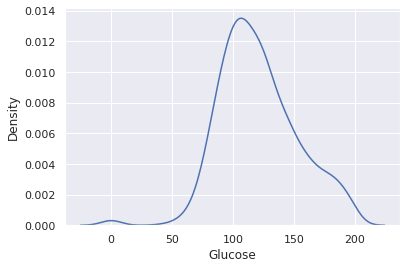

In [ ]:
import seaborn as sns; sns.set_theme()
sns.kdeplot(data=diabetes, x= diabetes['Glucose'])

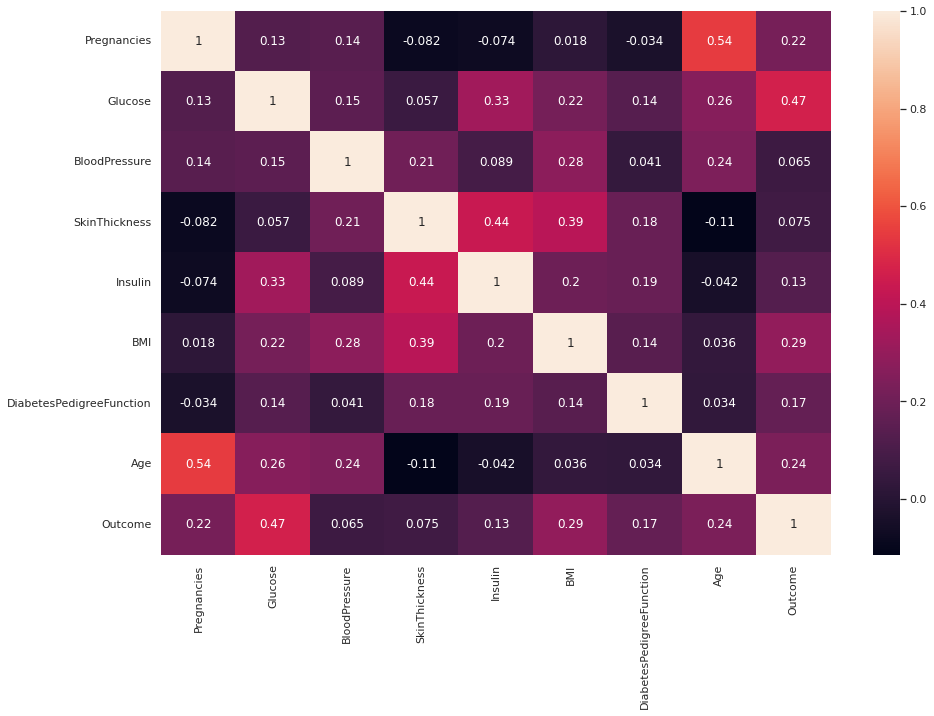

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(diabetes.corr(), annot=True, ax = ax)

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    diabetes.iloc[:, :-1], diabetes.iloc[:, -1],
    test_size = 0.50 , random_state=42) 
 
print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (384, 8) and Y = (384,) : 
Test data shape of X = (384, 8) and Y = (384,) : 


In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(max_iter= 1000)
lreg.fit(x_train, y_train)

lreg_y_pred = lreg.predict(x_test)
lreg.score(x_test, y_test)

0.7864583333333334

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(
    diabetes_copy.iloc[:, :-1], diabetes_copy.iloc[:, -1],
    test_size = 0.10 , random_state=42) 
 
print("Train data shape of X = % s and Y = % s : "%(
    x1_train.shape, y1_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x1_test.shape, y1_test.shape))

Train data shape of X = (691, 7) and Y = (691,) : 
Test data shape of X = (77, 7) and Y = (77,) : 


In [ ]:
lreg = LogisticRegression(max_iter= 1000)
lreg.fit(x1_train, y1_train)

lreg_y1_pred = lreg.predict(x1_test)
lreg.score(x1_test, y1_test)

0.7142857142857143

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = diabetes.drop('Outcome', axis=1)

min_max = MinMaxScaler()

X = min_max.fit_transform(X)

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,2,3,4,0.1,700,]}

grid_search = GridSearchCV(lreg.fit, param_grid)

grid_search.fit(x_train, y_train)

grid_search.best_score_